In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [ ]:
#Generatic quadratic function y = A(x-B)^2, parameters is an array of parameter values: paramters[0] = A, parameters[1] = B
def quadratic(parameters, times):
    return parameters[0]*(times - parameters[1])**2

#This is the loss function we want to minimize, it takes a difference of the quadratic with the givn parameters from the "data" or function we want to fit
def quadratic_diff_square(parameters, times, data):
    return np.sum((quadratic(parameters, times) - data)**2)

In [ ]:
# Generating an array of time values
times_array = np.linspace(-4,4,100)

# Plugging these time values into our "mystery" quadratic, it is clear what the actual parameters are here
mystery_quadratic = 12*(times_array - 2)**2

# Minimization requires a first guess of parameter values, the closer the guess is to the actual parameters, the faster it converges
guess = [10, 4]

# This function is not necessary, it allows us to visualize how the parameters are adjusted
def visualize_callback(parameters):
    plt.plot(times_array, mystery_quadratic)
    plt.plot(times_array, quadratic(parameters, times_array))
    plt.title(f"A = {parameters[0]}, B = {parameters[1]}")
    plt.show()

# These are the additional arguments our function we seek to minimize, the quadratic_diff_square
# function requires time values and data to compare it against, so that's what we set args to be
args = (times_array, mystery_quadratic)

# This is where the magic happens, we pass the function we seek to minimize parameters for, an initial guess,
# additional parameters, and where to callback after each iteration (optional)
quad_solution = minimize(quadratic_diff_square, guess, args=args, callback=visualize_callback)

#quad_solution is a dictionary, but calling .x gives you the final parameters
print(quad_solution)

plt.plot(times_array, mystery_quadratic)
plt.plot(times_array, quadratic(quad_solution.x, times_array))
plt.title(f"Solution: A = {quad_solution.x[0]}, B = {quad_solution.x[1]}")
plt.show()

Now it's time to do your own fitting to a more complex function! The data has been provided to you but this time you don't know the parameters. The only code provided to you is the code necessary to make the parameterized function, all the minimizing is up to you.


In [ ]:
# To avoid imaginary numbers, this is just like normal exponentiation, but it forces all functions to be odd so everything is real 
def odd_power(base, exponent):
    return np.sign(base)*np.power(np.abs(base),exponent)
# This is the parameterized function you will try to fill in, it's essentially a fancy version of Ax^B + Cx
def param_func(parameters, times):
    return parameters[0]*odd_power(times, parameters[1]) + parameters[2]*times

# Get minimizing!

guess = [6,.33,-1]

data = np.array(pd.read_csv('fitting_function_test_data.csv'))
times = data[:,0]
outputs = data[:,1]

print(data)
plt.plot(times, outputs)
plt.plot(times, param_func(guess,times))

def objfunc(parameters, times, data):
    return np.sum((param_func(parameters, times) - data)**2)

args = (times, outputs)

objsolution = minimize(objfunc,guess, args = args)
print(objsolution.x)
plt.plot(times, param_func(objsolution.x, times))

    
 


[[-5.00000000e+00  7.39783712e+01]
 [-4.89898990e+00  6.69114615e+01]
 [-4.79797980e+00  6.02296289e+01]
 [-4.69696970e+00  5.39218039e+01]
 [-4.59595960e+00  4.79770102e+01]
 [-4.49494949e+00  4.23843654e+01]
 [-4.39393939e+00  3.71330821e+01]
 [-4.29292929e+00  3.22124700e+01]
 [-4.19191919e+00  2.76119361e+01]
 [-4.09090909e+00  2.33209870e+01]
 [-3.98989899e+00  1.93292299e+01]
 [-3.88888889e+00  1.56263740e+01]
 [-3.78787879e+00  1.22022324e+01]
 [-3.68686869e+00  9.04672331e+00]
 [-3.58585859e+00  6.14987215e+00]
 [-3.48484848e+00  3.50181292e+00]
 [-3.38383838e+00  1.09279020e+00]
 [-3.28282828e+00 -1.08683891e+00]
 [-3.18181818e+00 -3.04660288e+00]
 [-3.08080808e+00 -4.79591357e+00]
 [-2.97979798e+00 -6.34406405e+00]
 [-2.87878788e+00 -7.70022630e+00]
 [-2.77777778e+00 -8.87344873e+00]
 [-2.67676768e+00 -9.87265359e+00]
 [-2.57575758e+00 -1.07066343e+01]
 [-2.47474747e+00 -1.13840524e+01]
 [-2.37373737e+00 -1.19134347e+01]
 [-2.27272727e+00 -1.23031699e+01]
 [-2.17171717e+00 -1

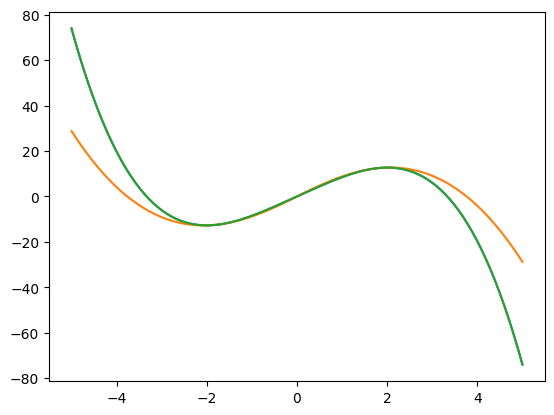

In [40]:
data = np.array(pd.read_csv('fitting_function_test_data2.csv'))
times = data[:,0]
outputs = data[:,1]

guess = [-1.2,2.6,10]
plt.plot(times, outputs)
plt.plot(times, param_func(guess, times))

print(np.array([times, outputs]).T)


print(objsolution.x)
plt.plot(times, param_func(objsolution.x, times))

